In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df=pd.read_csv("D:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets\\diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
sns.set_style('whitegrid')

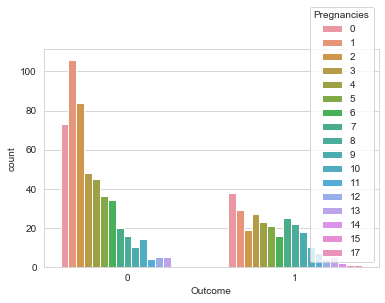

In [9]:
sns.countplot(x='Outcome',hue='Pregnancies',data=df)

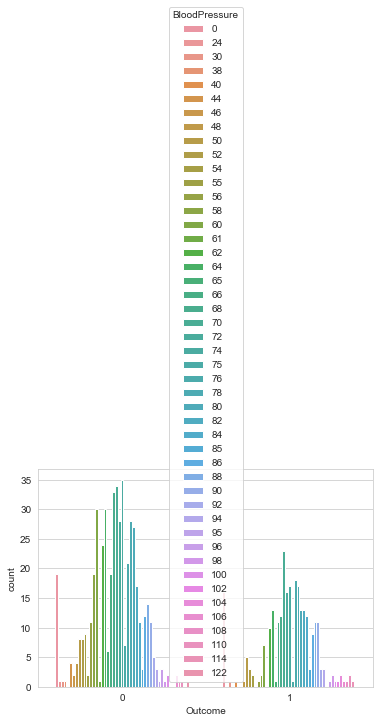

In [12]:
sns.countplot(x='Outcome',hue='BloodPressure',data=df)

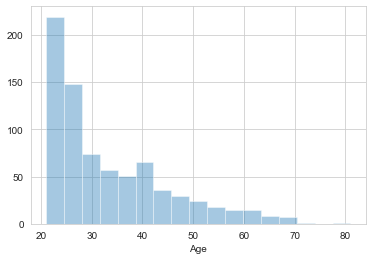

In [15]:
sns.distplot(df['Age'],kde=False)

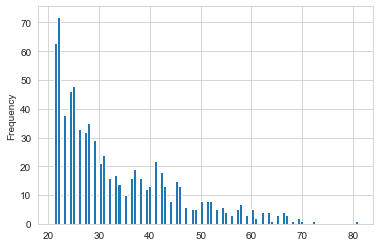

In [16]:
df['Age'].plot.hist(bins=100)

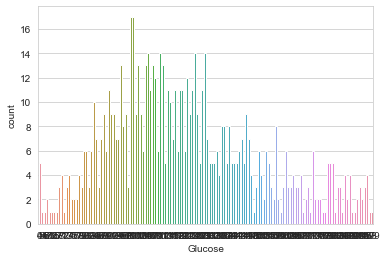

In [18]:
sns.countplot(x="Glucose",data=df)

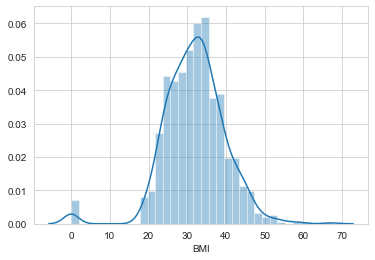

In [22]:
sns.distplot(df['BMI'])

In [26]:
import cufflinks as cf

In [27]:
cf.go_offline()

In [28]:
df['Age'].iplot(kind='hist',bins=100)

In [29]:
df['Glucose'].iplot(kind='hist',bins=100)

In [30]:
df.iplot(kind='heatmap')

C:\Users\Pawas\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\Pawas\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



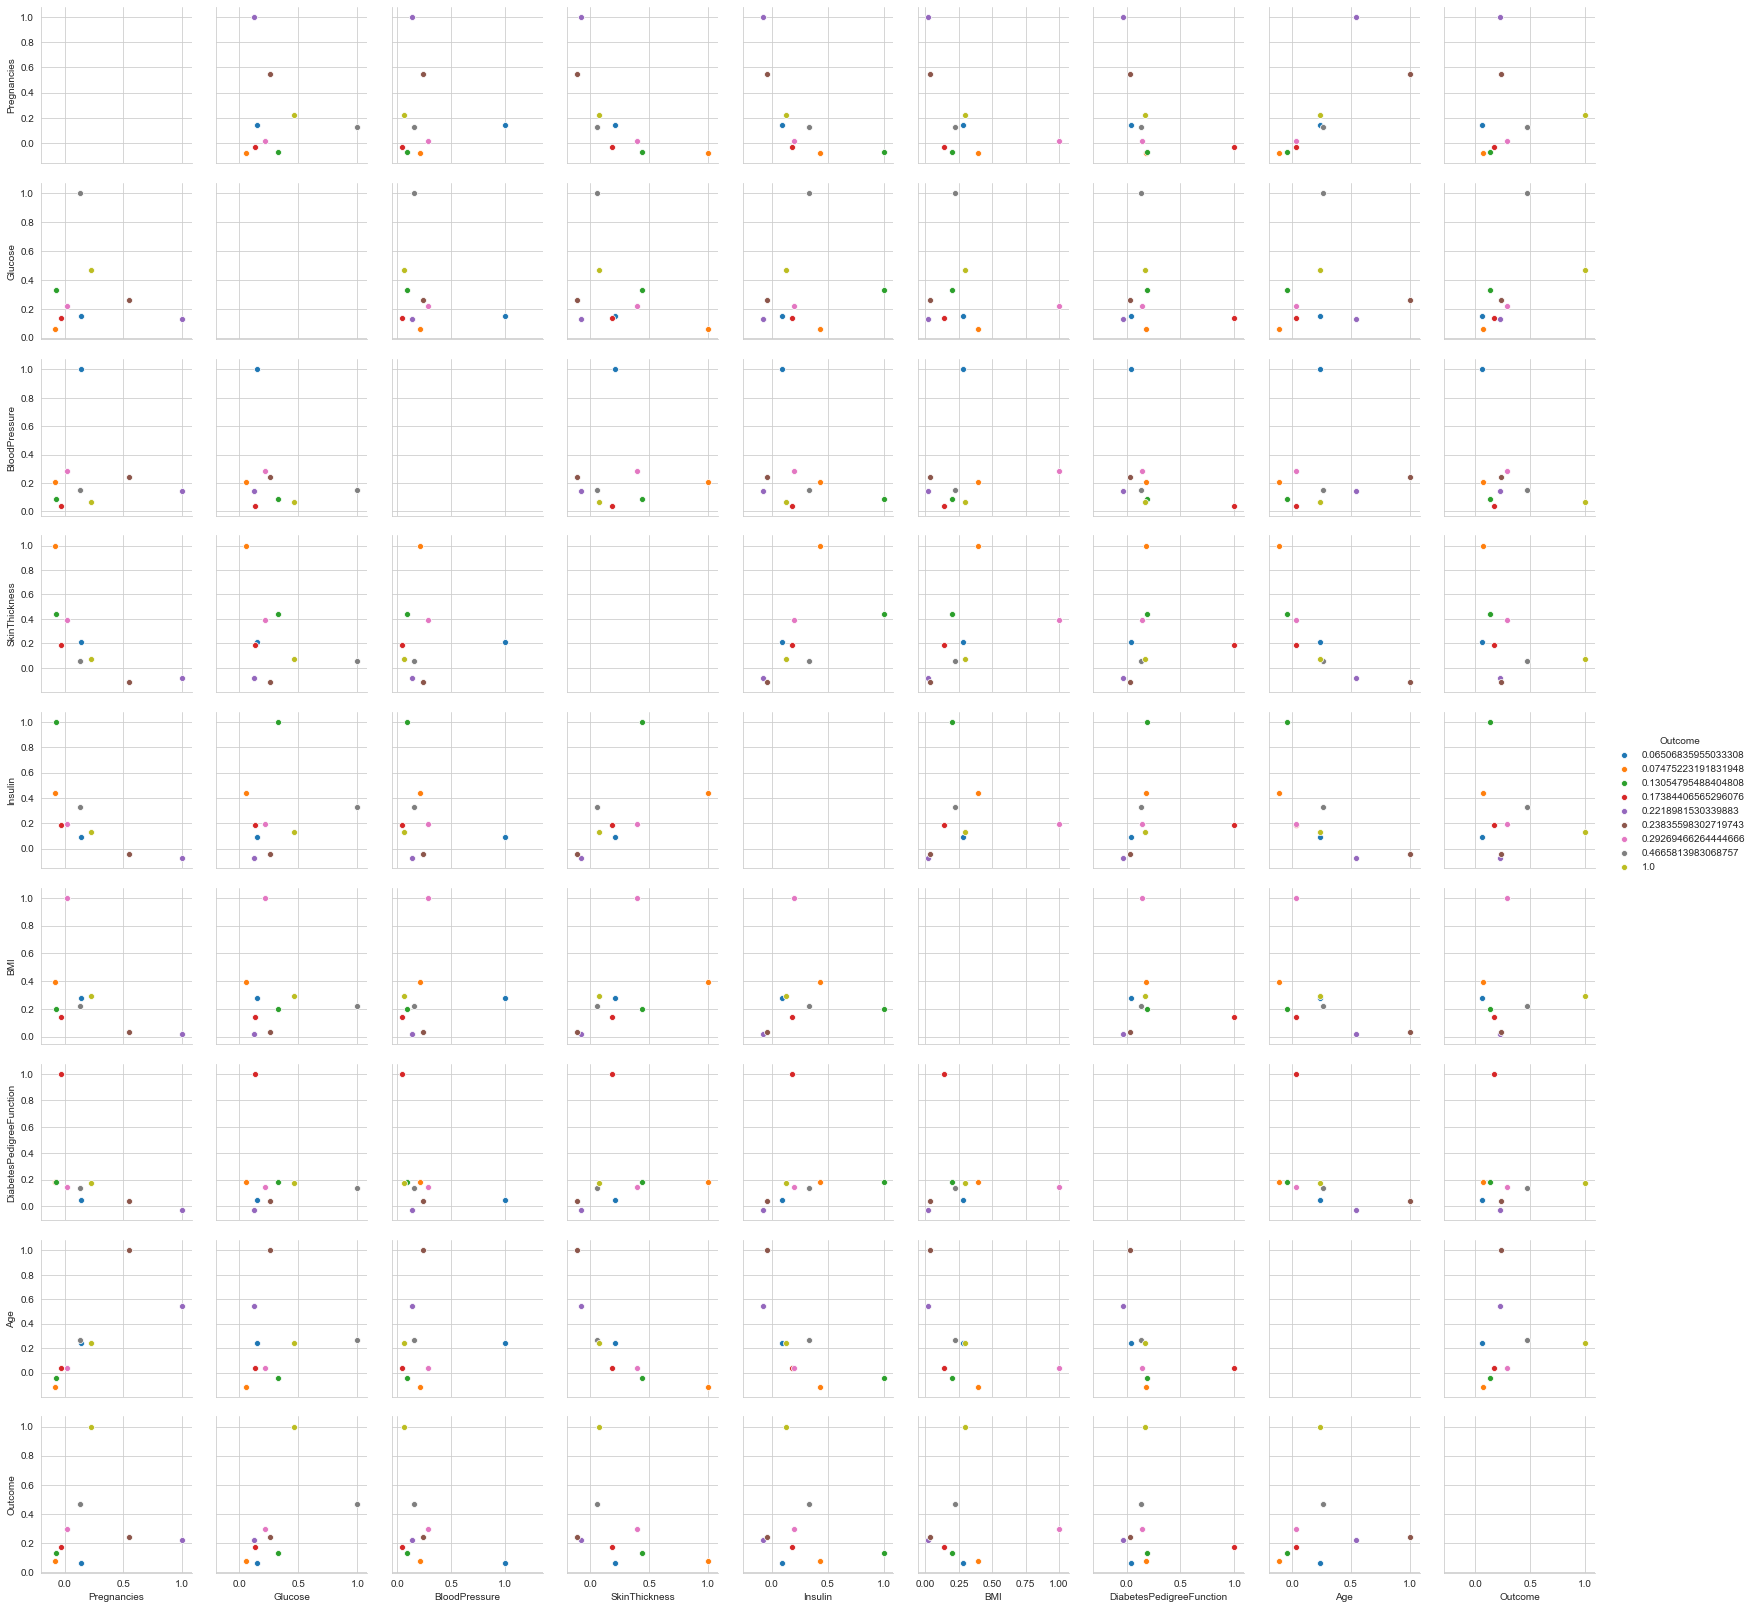

In [37]:
sns.pairplot(a,hue="Outcome")

##### UPTO HERE IT WAS JUST THE EXPLORATORY DATA ANALYSIS

#NOW WE START BY CLEANING OUR DATA, IF WE HAD ANY MISSING DATA WE WOULD BE USING 
#sns.boxplot(x='Age',y=BMI,data=df),, IN ORDER TO FILL THE MISSING POINTS WITH THEIR MEAN
#ON APPLYING ABOVE METHOD WE GET THE MEANS OF BMI
#IF THERE ARE TOO MANY MISSING POINTS IN ANY COLUMN THAN WE CAN DROP THE COLUMN

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As you can see that there is no null values so filtering of Data is not recommended

In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
x=df.drop('Outcome',axis=1)

In [44]:
y=df['Outcome']

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
train_test_split=x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
cf=RandomForestClassifier(n_estimators=100)

In [50]:
cf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
pred_=cf.predict(x_test)

In [52]:
pred_

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [57]:
classification_report(y_test,pred_)

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       150\n           1       0.70      0.64      0.67        81\n\n    accuracy                           0.78       231\n   macro avg       0.76      0.75      0.75       231\nweighted avg       0.78      0.78      0.78       231\n'

In [58]:
confusion_matrix(y_test,pred_)

array([[128,  22],
       [ 29,  52]], dtype=int64)

In [59]:
accuracy_score(y_test,pred_)

0.7792207792207793